In [1]:
import numpy as np
import torch 
import matplotlib.pyplot as plt

### $ 根据热力学的原理，在温度为T时，出现能量差为dE的降温的概率为P(dE)，表示为：$
# $ P(dE) = exp( dE/(k*T) ) $
### $ 其中k是一个常数，exp表示自然指数，且dE<0(温度总是降低的)。这条公式指明了 $

# 待优化函数

In [2]:
def f(x=1): #待最小函数
    return np.random.randn(100000)[x]
f()

0.34562015016600356

In [3]:
X = np.random.randn(100).reshape(10,10)
Y = np.random.randn(100).reshape(10,10)
def minkowski(x, y, p ):
    return np.sum(np.abs(x - y) ** p) ** (1 / p)

In [4]:
for i in range(1,10):
    print(minkowski(X,Y,i))

128.60363286027138
15.46972856095734
8.287924859198371
6.342476907468081
5.538618520340065
5.133493416313169
4.904352706055179
4.764611673964163
4.6747660483699605


# 退火算法

In [5]:
def PDE(DE,t,k=1):
    return np.exp((DE)/(k*t))

In [6]:
def DE_function(new,old):
    return new - old

In [7]:
def jump(DE,T,k=1):
    return PDE(DE,T,k) > np.random.rand() and 0 or 1# 

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x=1): #待优化最小函数
    return np.random.randn(100000)[x]

def minkowski(x, y, p ):
    return np.sum(np.abs(x - y) ** p) ** (1 / p)

def PDE(DE,t,k=1):
    return np.exp((DE)/(k*t))

def DE_function(new,old):
    return new - old

def jump(DE,T,k=1):
    return PDE(DE,T,k) > np.random.rand() and 0 or 1# 

def simulated_annealing(X,Y,ps,parameter={"T":1,"T_min":0,"r":0.0001,"expr":0,"jump_max":np.inf}):
    path , funcpath = [] ,[]

    T = parameter["T"] #系统温度，初时应在高温
    T_min = parameter["T_min"] #最小温度值
    r = parameter["r"] #降温速率
    counter = 0
    expr = parameter["expr"] #假设初解
    jump_max = parameter["jump_max"] # 最大冷却值
    jump_counter = 0

    for p in ps:
        if T > T_min and T != 1:
            print(1)
            return expr,path,funcpath
        counter += 1
        new_expr = minkowski(X,Y,p) #新解
        funcpath.append(new_expr)
        DE = new_expr - expr 
        print(DE,expr)
        if DE <= 0:
            expr = new_expr
            jump_counter = 0
        elif DE > 0:
            expr = expr
            if jump(DE,T):
                T *= r
                jump_counter += 1  
                if jump_counter > jump_max:
                    print("最大回炉冷却次数:",jump_counter)
                    return expr,path,funcpath
        path.append(expr)
        print("{}{}{}{}{}{}{}{}".format('系统温度:',T,' 新状态:',expr,' 迭代轮次:',counter,' DE:',DE))
        
    return expr,path,funcpath
expr,path,funcpath = simulated_annealing(X,Y,np.linspace(1,20,1000),parameter={"T":1,"T_min":0,"r":0.11,"expr":0,"jump_max":1000})

128.60363286027138 0
系统温度:0.11 新状态:0 迭代轮次:1 DE:128.60363286027138
1


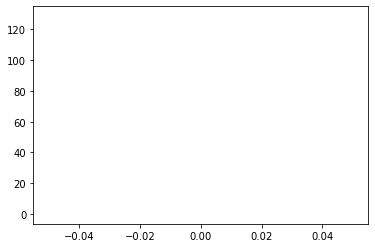

In [9]:
plt.plot(path,c='g')
plt.plot(funcpath,c='r')

In [10]:
np.linspace(10**(-8),20,1000)

array([1.00000000e-08, 2.00200300e-02, 4.00400500e-02, 6.00600700e-02,
       8.00800900e-02, 1.00100110e-01, 1.20120130e-01, 1.40140150e-01,
       1.60160170e-01, 1.80180190e-01, 2.00200210e-01, 2.20220230e-01,
       2.40240250e-01, 2.60260270e-01, 2.80280290e-01, 3.00300310e-01,
       3.20320330e-01, 3.40340350e-01, 3.60360370e-01, 3.80380390e-01,
       4.00400410e-01, 4.20420430e-01, 4.40440450e-01, 4.60460470e-01,
       4.80480490e-01, 5.00500510e-01, 5.20520530e-01, 5.40540550e-01,
       5.60560570e-01, 5.80580590e-01, 6.00600610e-01, 6.20620630e-01,
       6.40640650e-01, 6.60660670e-01, 6.80680690e-01, 7.00700710e-01,
       7.20720730e-01, 7.40740750e-01, 7.60760770e-01, 7.80780790e-01,
       8.00800810e-01, 8.20820830e-01, 8.40840850e-01, 8.60860870e-01,
       8.80880890e-01, 9.00900910e-01, 9.20920930e-01, 9.40940950e-01,
       9.60960970e-01, 9.80980990e-01, 1.00100101e+00, 1.02102103e+00,
       1.04104105e+00, 1.06106107e+00, 1.08108109e+00, 1.10110111e+00,
      